In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import datetime

Do të marr kuotën e aksioneve të kompanisë “MICROSOFT” duke përdorur simbolin e aksioneve të kompanisë (MSFT) nga 1 janari 2012 deri më 31 tetor 2023.

In [2]:
import yfinance as yf
df = yf.download('MSFT', start = '2012-01-01', end='2023-10-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.278030,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.778784,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.001341,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.343119,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.049026,59706800
...,...,...,...,...,...,...
2023-10-24,331.299988,331.839996,327.600006,330.529999,329.860504,31153600
2023-10-25,345.019989,346.200012,337.619995,340.670013,339.979980,55053800
2023-10-26,340.540009,341.630005,326.940002,327.890015,327.225861,37828500


Këto janë kuotat e aksioneve të Microsoft. Më pas, do të tregoj numrin e rreshtave dhe kolonave në setin e të dhënave. Rezultati tregon se kemi 2976 rreshta ose ditë ku është regjistruar çmimi i aksioneve dhe 6 kolona

In [4]:
df.shape

(2976, 6)

In [30]:
df.isnull

<bound method DataFrame.isnull of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.278030   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.778784   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.001341   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.343119   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.049026   
...                ...         ...         ...         ...         ...   
2023-10-24  331.299988  331.839996  327.600006  330.529999  329.860504   
2023-10-25  345.019989  346.200012  337.619995  340.670013  339.979980   
2023-10-26  340.540009  341.630005  326.940002  327.890015  327.225861   
2023-10-27  330.429993  336.720001  328.399994  329.809998  329.141968   
2023-10-30  333.410004  339.450012  331.829987  337.309998  336.626770   

   

In [31]:
df.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.278030   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.778784   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.001341   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.343119   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.049026   
...                ...         ...         ...         ...         ...   
2023-10-24  331.299988  331.839996  327.600006  330.529999  329.860504   
2023-10-25  345.019989  346.200012  337.619995  340.670013  339.979980   
2023-10-26  340.540009  341.630005  326.940002  327.890015  327.225861   
2023-10-27  330.429993  336.720001  328.399994  329.809998  329.141968   
2023-10-30  333.410004  339.450012  331.829987  337.309998  336.626770   

     

In [32]:
df.describe


<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.278030   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.778784   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.001341   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.343119   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.049026   
...                ...         ...         ...         ...         ...   
2023-10-24  331.299988  331.839996  327.600006  330.529999  329.860504   
2023-10-25  345.019989  346.200012  337.619995  340.670013  339.979980   
2023-10-26  340.540009  341.630005  326.940002  327.890015  327.225861   
2023-10-27  330.429993  336.720001  328.399994  329.809998  329.141968   
2023-10-30  333.410004  339.450012  331.829987  337.309998  336.626770   

   

Me poshte do te krijojme nje grafik per te vizualizuar te dhenat:

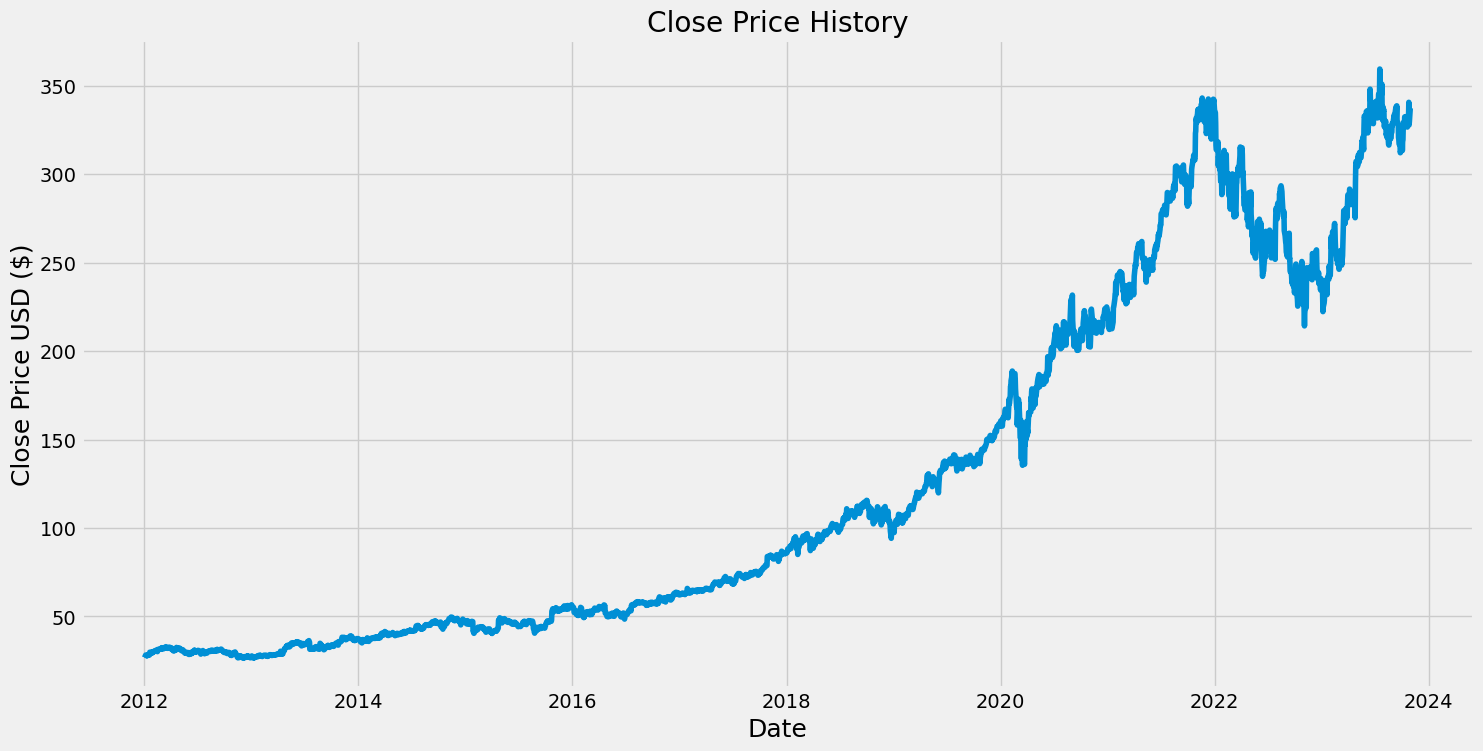

In [5]:
#Shfaq historikun e çmimit të mbylljes
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

Krijojme një dataframe të ri vetëm me çmimin e mbylljes dhe e kthejme atë në një array. Pastaj krijojme një variabël për të ruajtur gjatësinë e setit të të dhënave të trajnimit. Dua që seti i të dhënave të trajnimit të përmbajë rreth 80% të të dhënave.

In [6]:
#Dataframe i ri me cmimin e mbylljes
data = df.filter(['Close'])
#E konvertojme ne nje numpy array
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

Tani ridimensionojme setin e të dhënave në mënyrë që të jenë vlera midis 0 dhe 1 përfshirë, e bëjme këtë sepse është praktikë e mirë në përgjithësi të ridimensionosh të dhënat para se t’i japesh ato rrjetit neural.

In [7]:
#Shkallëzo të gjitha të dhënat në mënyrë që të jenë vlera të përfshira në mes 0 dhe 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Krijojme një set të dhënash trajnuese që përmban vlerat e çmimeve të mbylljes të 90 ditëve të fundit që dëshironi t'i përdorni për të parashikuar vlerën e çmimit të mbyllur të 91-të. Pastaj, kolona e parë në setin e të dhënave 'x_train' do të përmbajë vlerat nga seti i të dhënave nga indeksi 0 deri në indeksin 89 (90 vlera në total) dhe kolona e dytë do të përmbajë vlerat nga seti i të dhënave nga indeksi 1 deri në indeksin 90 (90 vlera) dhe kështu me radhë. Seti i të dhënave "y_train" do të përmbajë vlerën e 91-të e vendosur në indeksin 90 për kolonën e saj të parë dhe vlerën e 92-të e vendosur në indeksin 91 të setit të të dhënave për vlerën e dytë dhe kështu me radhë.







In [8]:
#Krijojme nje set per trajnimin
train_data = scaled_data[0:training_data_len  , : ]
#Ndajme te dhenat ne x_train e  y_train
x_train=[]
y_train = []
for i in range(90,len(train_data)):
 x_train.append(train_data[i-90:i,0])
 y_train.append(train_data[i,0])

In [9]:
# Konvertojme x_train e y_train ne array
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#I bejme nje reshape te dhenave ne formen e pranuar nga modeli LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
from keras.layers import Dropout

In [12]:
 #Ndërtojmë modelin e rrjetit LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=50))
model.add(Dense(units=1))

In [13]:
from keras.optimizers import Adam

In [14]:
# Kompilojme modelin me nje custom learning rate
custom_optimizer = Adam(lr=0.001)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

Epoch 1/30
36/36 [==============================] - 7s 202ms/step - loss: 2.7243e-04
Epoch 2/30
36/36 [==============================] - 8s 225ms/step - loss: 2.7746e-04
Epoch 3/30
36/36 [==============================] - 8s 211ms/step - loss: 2.7588e-04
Epoch 4/30
36/36 [==============================] - 7s 203ms/step - loss: 2.8415e-04
Epoch 5/30
36/36 [==============================] - 7s 196ms/step - loss: 2.4137e-04
Epoch 6/30
36/36 [==============================] - 7s 206ms/step - loss: 2.7022e-04
Epoch 7/30
36/36 [==============================] - 7s 196ms/step - loss: 2.6449e-04
Epoch 8/30
36/36 [==============================] - 7s 205ms/step - loss: 2.7278e-04
Epoch 9/30
36/36 [==============================] - 7s 196ms/step - loss: 2.6438e-04
Epoch 10/30
36/36 [==============================] - 7s 203ms/step - loss: 2.5935e-04
Epoch 11/30
36/36 [==============================] - 7s 200ms/step - loss: 2.5957e-04
Epoch 12/30
36/36 [==============================] - 7s 201ms/s

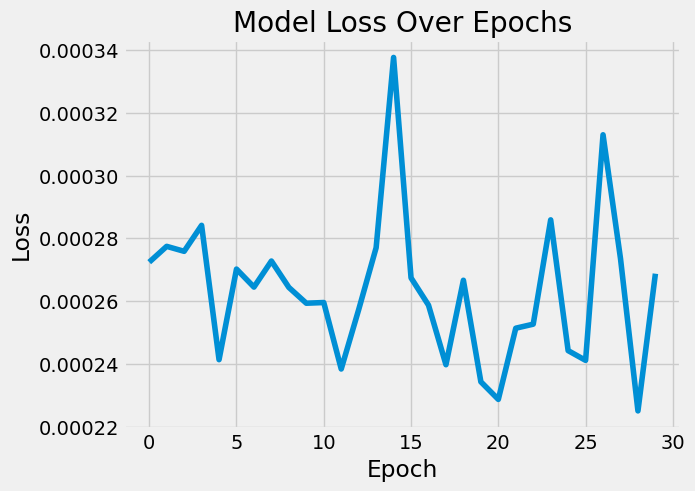

In [29]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, batch_size=64, epochs=30)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [16]:
#Test data
test_data = scaled_data[training_data_len - 90: , : ]
#Krijojme nje set te dhenash x_test e y_test
x_test = []
y_test = dataset[training_data_len : , : ]
#Merr të gjitha rreshtat nga indeksi 1603 dhe përtej, dhe të gjitha kolonat (në këtë rast është vetëm kolona 'Mbyllja'), kështu që 2976 - 2381 = 595 rreshta të të dhënave.
for i in range(90,len(test_data)):
 x_test.append(test_data[i-90:i,0])

In [17]:
# Konvertojme x_test ne nje array numpy
x_test = np.array(x_test)

In [18]:
#Reshapete dhenat ne nje format te pranuar nga modeli LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [19]:
#Marrim parashikimet per modelin
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 2s 52ms/step


In [20]:
#Llogarit / Merr vleren e RMSE(root-mean-square-error)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

12.88093979869552

C:\Users\AG\AppData\Local\Temp\ipykernel_8788\2561257785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


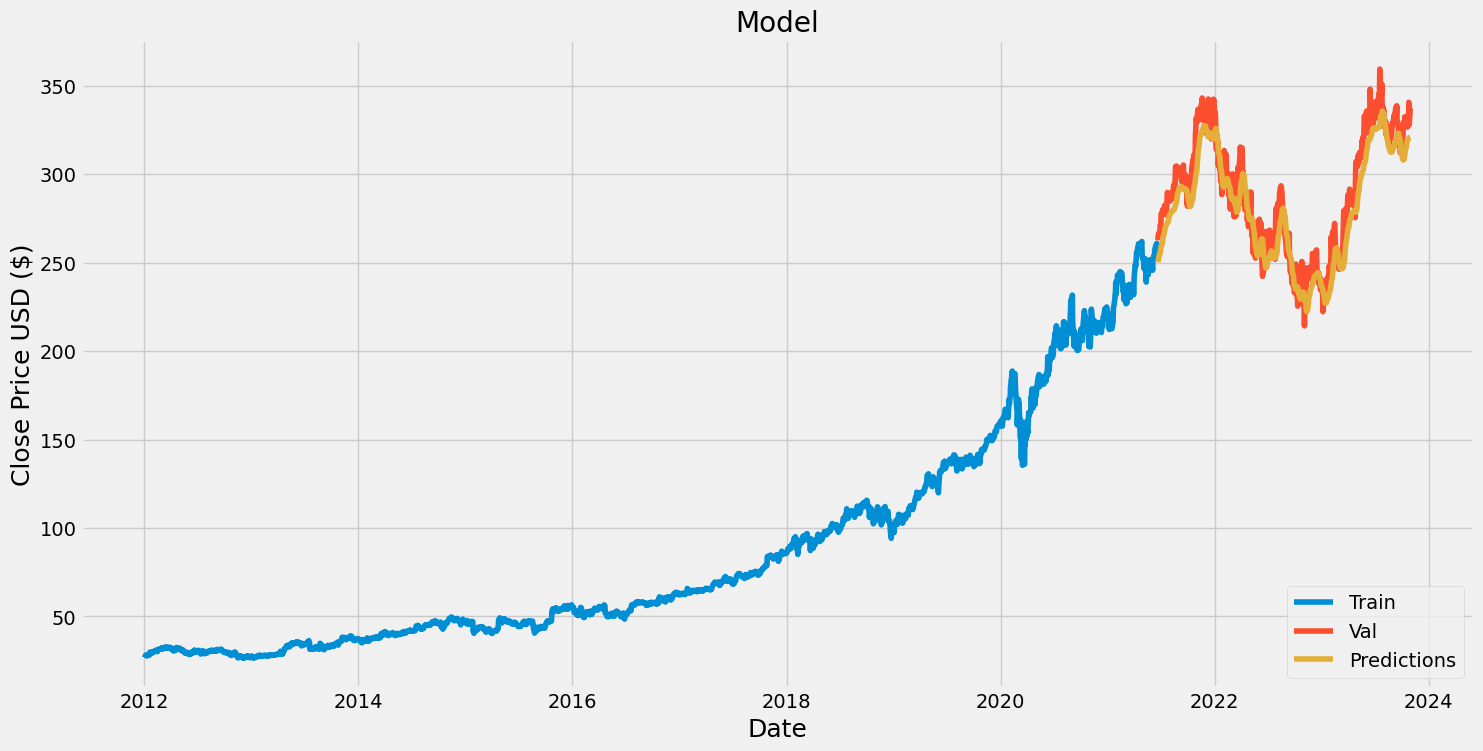

In [21]:
# Gjurmon/ Krijon te dhenat
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Vizualizojme te dhenat
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
valid

,Close,Predictions
Date,,
2021-06-21,262.630005,250.332016
2021-06-22,265.510010,251.172318
2021-06-23,265.269989,252.093094
2021-06-24,266.690002,253.071747
2021-06-25,265.019989,254.101044
...,...,...
2023-10-24,330.529999,320.047272
2023-10-25,340.670013,320.144104
2023-10-26,327.890015,320.517761


In [23]:
msft_quote = yf.download('MSFT', start = '2012-01-01', end='2023-10-31')
#Krijojme nje dataframe te ri
new_df = msft_quote.filter(['Close'])
# Marrim cmimin e mbylljes per 90 ditet
last_90_days = new_df[-90:].values
#Shkallëzo të dhënat në mënyrë që të jenë vlera të përfshira në mes 0 dhe 1
last_90_days_scaled = scaler.transform(last_90_days)
#Krijojme nje liste boshe
X_test = []
#Shtojme 90 ditet e fundit
X_test.append(last_90_days_scaled)
# Konvertojme setin e te dhenave X_test ne nje array
X_test = np.array(X_test)
#Ridimensionojme te dhenat
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Marrim cmimin e parashikuar
pred_price = model.predict(X_test)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 22ms/step


In [24]:
pred_price = scaler.inverse_transform (pred_price)
print (pred_price)

[[321.28473]]


In [28]:
msft_quote2 = yf.download('MSFT', start = '2023-11-01', end='2023-11-14')
print(msft_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-11-01    346.070007
2023-11-02    348.320007
2023-11-03    352.799988
2023-11-06    356.529999
2023-11-07    360.529999
2023-11-08    363.200012
2023-11-09    360.690002
2023-11-10    369.670013
2023-11-13    366.679993
Name: Close, dtype: float64
